In [2]:

import os
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import re 
import string
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer# Text preprocessing


In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("sample_submission.csv") 
data.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [5]:
train = pd.read_csv('train.csv')  
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
test = pd.read_csv('test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
print(len(train))
train = train.drop_duplicates('text', keep='last')
print(len(train))

7613
7503


In [8]:
train.isnull().values.any()

True

C:\Anaconda\envs\gpu2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

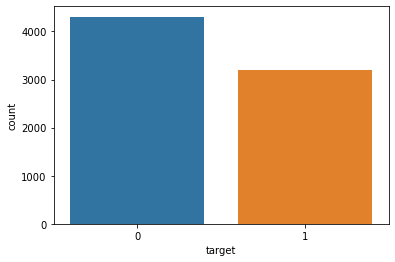

In [10]:
sns.countplot(train['target'])

In [12]:
train['target'].value_counts()

0    4307
1    3196
Name: target, dtype: int64

Unique keywords num=222
Unique keywords num=222


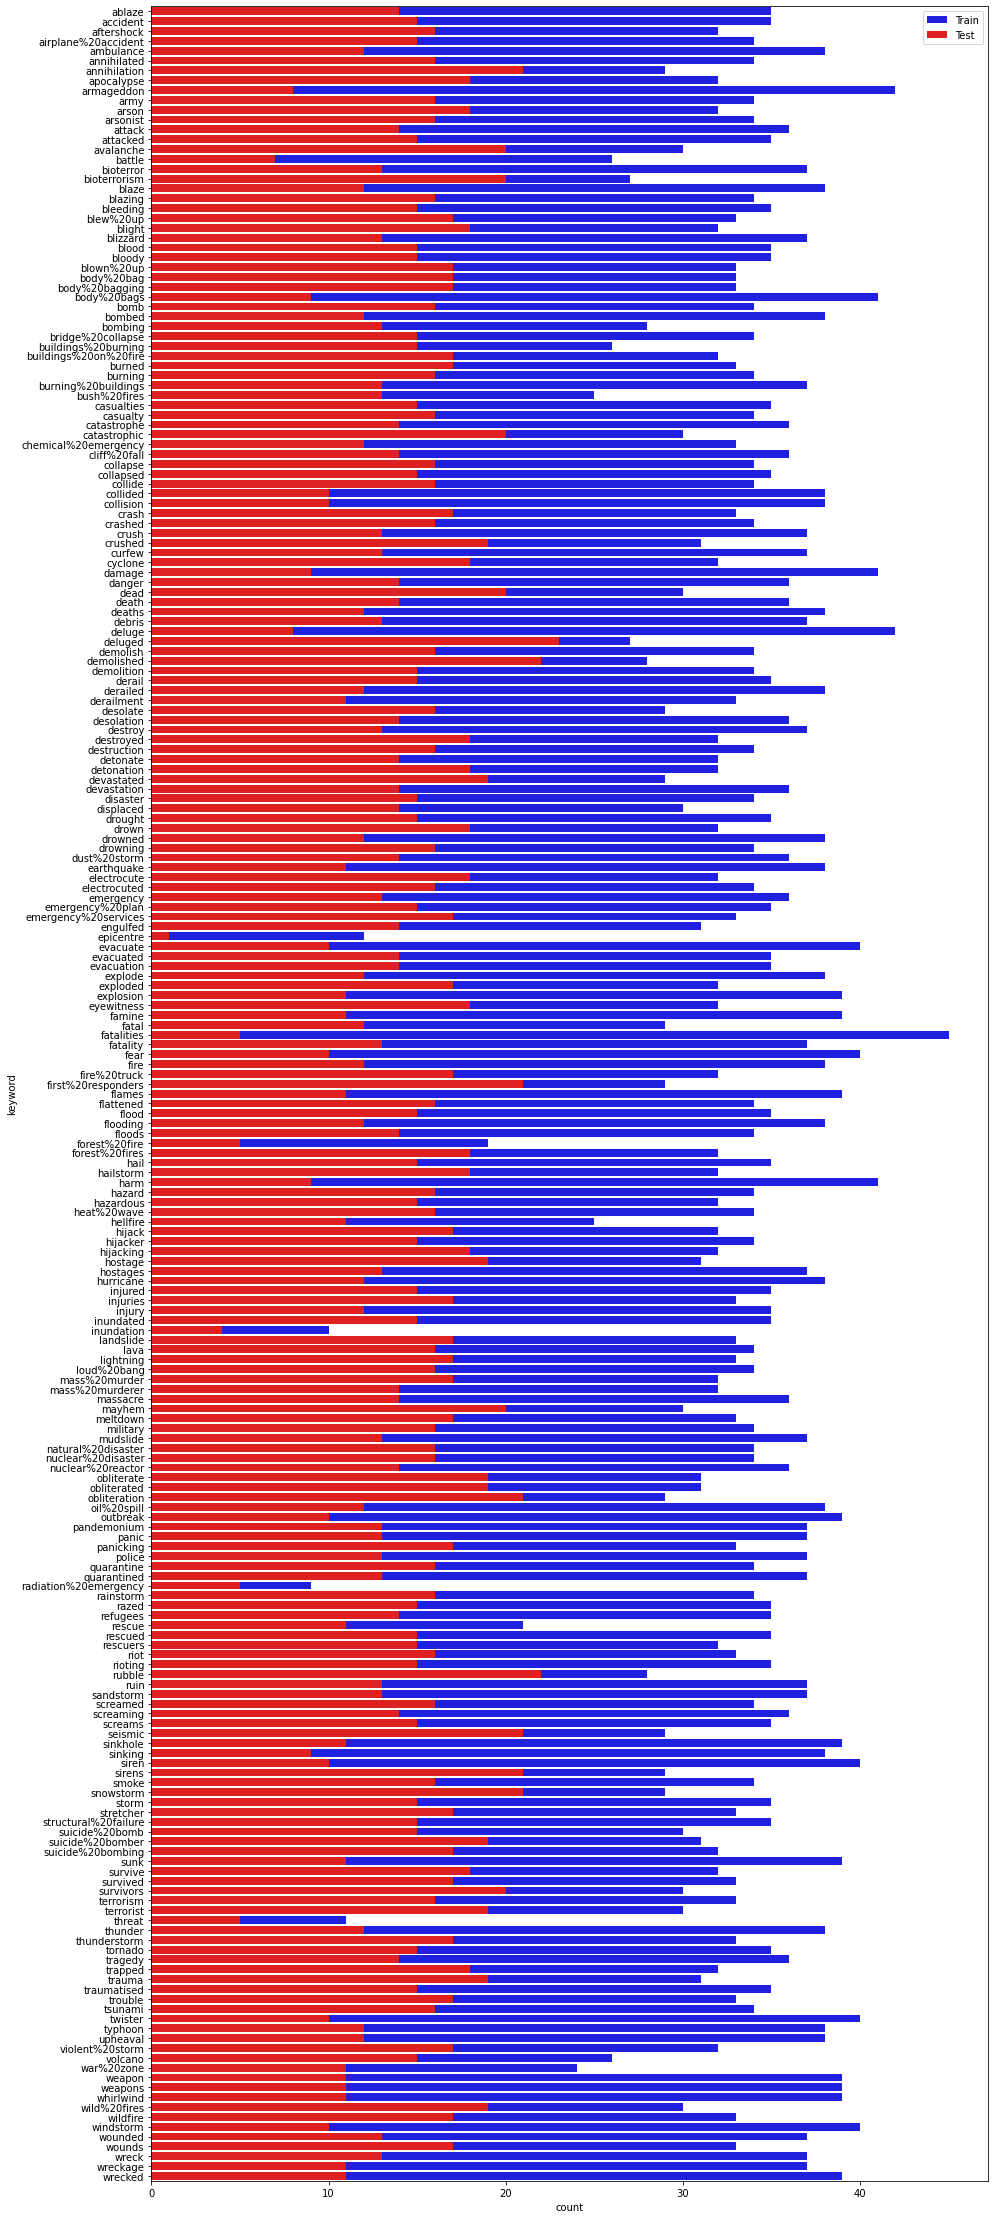

In [15]:
plt.figure(figsize=(15,40))
print(f'Unique keywords num={len(train.keyword.unique())}')
print(f'Unique keywords num={len(test.keyword.unique())}')
sns.countplot(y=train['keyword'], color=(0,0,1), label='Train')
sns.countplot(y=test['keyword'], color=(1,0,0), label='Test')
plt.legend()

<AxesSubplot:xlabel='count', ylabel='keyword'>

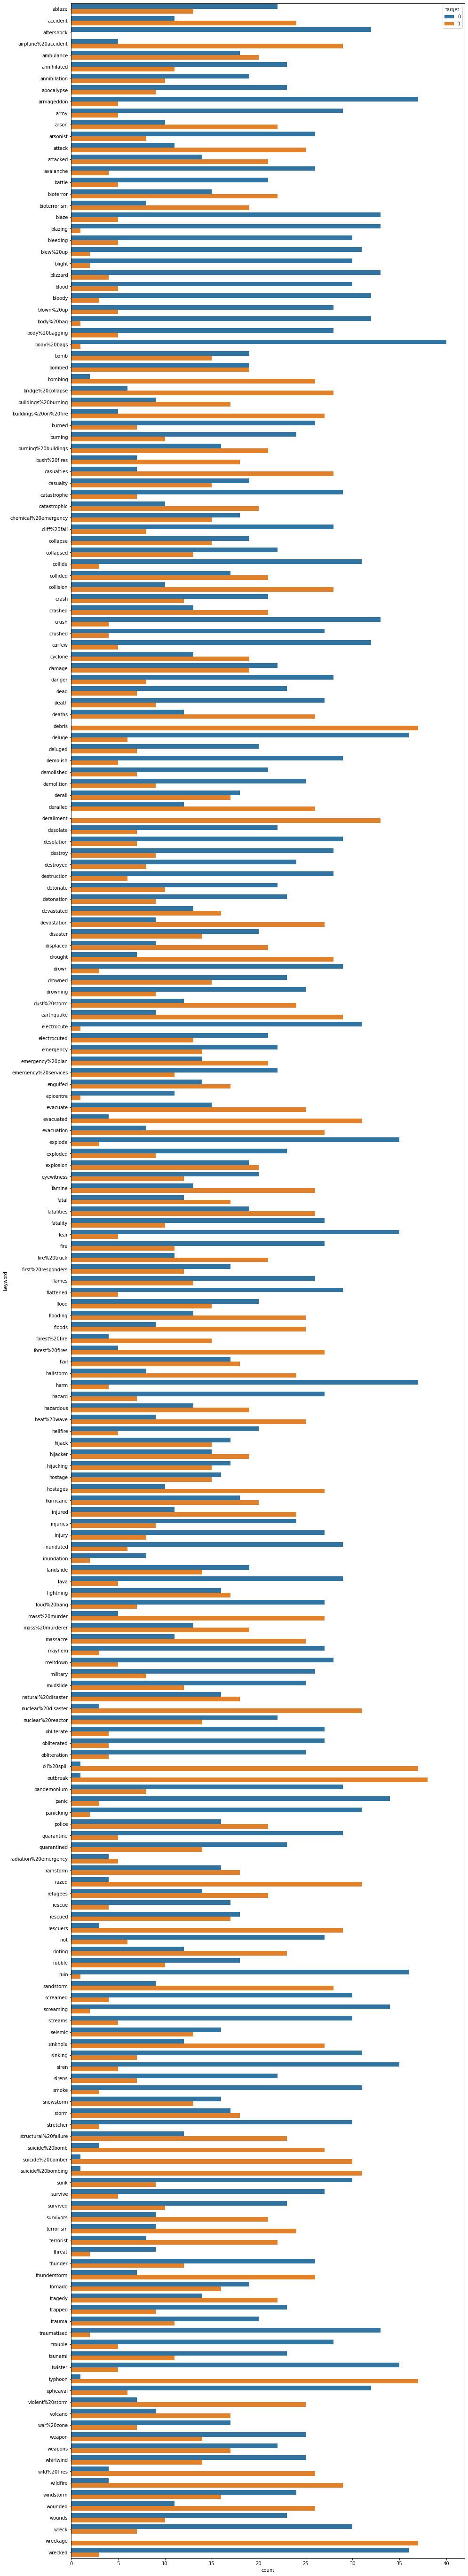

In [17]:
plt.figure(figsize=(15,100))
sns.countplot(data=train, y='keyword', hue='target')

In [18]:
EMOJIS = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
URLPATTERN        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
USERPATTERN       = '@[^\s]+'
SEQPATTERN   = r"(.)\1\1+"
SEQREPLACE = r"\1\1"

In [19]:
##Before cleaning
train['Text_len'] = train['text'].apply(lambda x :0 if type(x) != str else len(x.split(" ")))
train.head()

,id,keyword,location,text,target,Text_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,17


In [20]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordLemm = WordNetLemmatizer()

In [31]:
import re

def preprocess_text(text):
    text = text.strip().lower() # lower the string
    text = re.sub('\[.*?\]', '', text) # removes symbols (.*?\)
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove URLS
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuations
    text = re.sub('\n', '', text) # remove next line character
    text = re.sub('\w*\d\w*', '', text)
    
    ### Replacing URL
    text = re.sub(URLPATTERN,' URL',text)
    ### Replacing EMOJI
    for emoji in EMOJIS.keys():
        text = text.replace(emoji, "EMOJI" + EMOJIS[emoji])  
    ### Replacing USER pattern
    text = re.sub(USERPATTERN,' URL',text)
    ### Removing non-alphabets
    text = re.sub('[^a-zA-z]'," ",text)
    ### Removing consecutive letters
    text = re.sub(SEQPATTERN,SEQREPLACE,text)
    text = text.split()
    text = [wordLemm.lemmatize(word) for word in text if not word in stopwords.words('english') and len(word) > 1]
    text = ' '.join(text)
    return text


In [32]:
train['text'] = train['text'].apply(preprocess_text)
test['text'] = test['text'].apply(preprocess_text)

In [33]:
train['Text_len'] = train['text'].apply(lambda x :0 if type(x) != str else len(x.split(" ")))
train.head()

,id,keyword,location,text,target,Text_len
0,1,NaN,NaN,deed reason earthquake may allah forgive,1,6
1,4,NaN,NaN,forest fire near la ronge sask canada,1,7
2,5,NaN,NaN,resident asked shelter place notified officer ...,1,11
3,6,NaN,NaN,people receive wildfire evacuation order calif...,1,6
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfire pour...,1,9


In [34]:
test['Text_len'] = test['text'].apply(lambda x :0 if type(x) != str else len(x.split(" ")))
test.head()

,id,keyword,location,text,Text_len
0,0,NaN,NaN,happened terrible car crash,4
1,2,NaN,NaN,heard earthquake different city stay safe ever...,7
2,3,NaN,NaN,forest fire spot pond goose fleeing across str...,10
3,9,NaN,NaN,apocalypse lighting spokane wildfire,4
4,11,NaN,NaN,typhoon soudelor kill china taiwan,5


<AxesSubplot:>

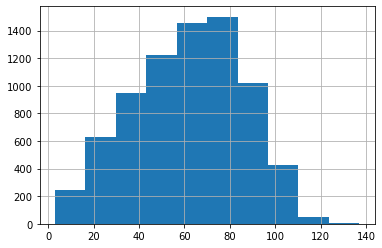

In [35]:
train['text'].str.len().hist()

<AxesSubplot:>

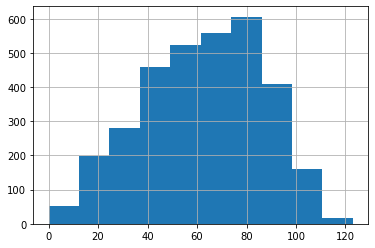

In [37]:
test['text'].str.len().hist()

In [38]:

# Code Snippet for Top Stopwords Barchart

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

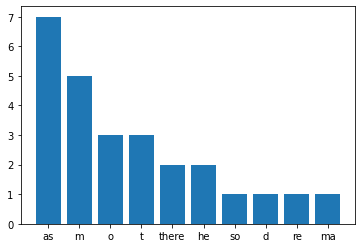

In [39]:
plot_top_stopwords_barchart(train['text'])

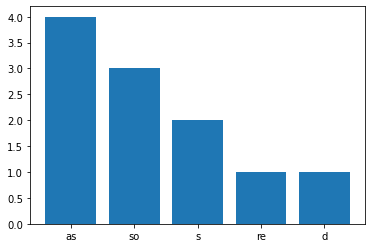

In [40]:
plot_top_stopwords_barchart(test['text'])

In [41]:
# Code Snippet for Word Length Histogram

import numpy as np

def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

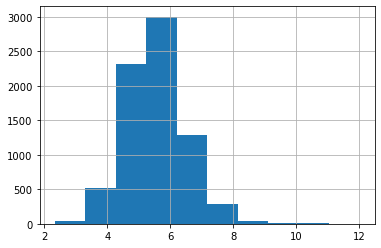

In [42]:
plot_word_length_histogram(train['text'])

C:\Anaconda\envs\gpu2\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda\envs\gpu2\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


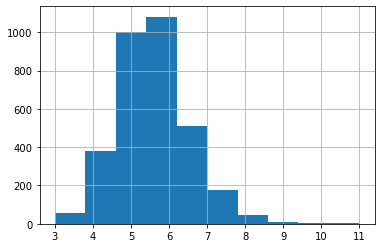

In [43]:
plot_word_length_histogram(test['text'])

In [46]:
#Bag of Words
bow = CountVectorizer(max_features=10000)
X_text = bow.fit_transform(train['text']).toarray()

In [47]:
train_text = pd.DataFrame(X_text, columns= bow.get_feature_names())
train_text.head()

C:\Anaconda\envs\gpu2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aal,aall,aan,aand,aannd,aar,aarrgghh,aashiqui,ab,...,zodiac,zombie,zombiefunrun,zone,zonewolf,zoom,zotar,zouma,zrnf,zumiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer



In [49]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(train.text) 
X_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:

x = train.iloc[:, 3]
y = train.iloc[:, 4]



In [59]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x)
x_text= vectorizer.transform(x)
x_text.shape
x_text= x_text.toarray()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_text, y, test_size = 0.3,\
                                                    random_state = 0)
    

In [60]:
from keras.models import Sequential
from keras import layers

In [61]:
n_featuers= x_train.shape[1]  # Number of features

my_classifier = Sequential()

In [64]:
from keras.layers import Dense

In [65]:
# Adding the input layer AND the first hidden layer (Pay attention to this)
my_classifier.add(Dense(units = 10000, kernel_initializer = 'uniform',
                        activation = 'relu', input_dim = n_featuers))




In [66]:
# Adding the second hidden layer
my_classifier.add(Dense(units =5000 , kernel_initializer = 'uniform',
                                                    activation = 'relu'))

my_classifier.add(Dense(units =1000 , kernel_initializer = 'uniform',
                                                    activation = 'relu'))
my_classifier.add(Dense(units =100 , kernel_initializer = 'uniform',
                                                    activation = 'relu'))
my_classifier.add(Dense(units =10 , kernel_initializer = 'uniform',
                                                    activation = 'relu'))


# Adding the last (output) layer
my_classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                        activation = 'sigmoid'))

In [67]:
# Compiling the ANN
my_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy'])


In [80]:
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

In [81]:
pip install pydot


Note: you may need to restart the kernel to use updated packages.


In [82]:
pip install graphviz 

Note: you may need to restart the kernel to use updated packages.


In [83]:
plot_model(my_classifier, to_file='model.png', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [ ]:
history = my_classifier.fit(x_train, y_train, validation_split=0.2,
                            batch_size = 2, epochs = 10)

Epoch 1/10
1722/2101 [=======================>......] - ETA: 5:11 - loss: 0.5670 - accuracy: 0.7413